In [1]:
#pip install tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
import tensorflow.compat.v2.feature_column as fc

In [3]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

In [4]:
#Neural Networks
from tensorflow import keras

<big><b>1. Creating Tensors</b></big>

Types of tensors:
- Variable
- Constant
- Placeholder
- SparseTensor

all types except for Variable are immutable

In [15]:
s = tf.Variable('this is a string',tf.string)
n = tf.Variable(12, tf.int16)
x = tf.Variable([[34.5,12.0],[0.0, 11.9]], tf.float64)

In [26]:
tf.zeros((2,3))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [27]:
tf.ones((1,2))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 1.]], dtype=float32)>

<b><big>2. Tensor Properties

In [16]:
# Rank/Degree of Tensors (dim)
tf.rank(s)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [17]:
tf.rank(x)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [18]:
# Shape of a tensor
x.shape

TensorShape([2, 2])

In [25]:
# Reshaping a tensor
y = tf.Variable([1,2,3,4,5,6], tf.float64)

tf.reshape(y,(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

<b><big>3. Linear Regression</b></big>

In [22]:
# Load the dataset
x_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
x_test = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

y_train = x_train.pop('survived')
y_test = x_test.pop('survived')

In [23]:
x_train.head(2)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n


In [38]:
y_train.head(2)

0    0
1    1
Name: survived, dtype: int64

In [24]:
# Process Categorical data
categorical = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
numeric = ['age','fare']

#create an object to map out categorical data into integers
features = []
for col in categorical:
    vocab = x_train[col].unique()
    features.append(tf.feature_column.categorical_column_with_vocabulary_list(col,vocab))
    
for col in numeric:
    features.append(tf.feature_column.numeric_column(col,dtype=tf.float32))

In [25]:
for col in features:
    print(col,'\n')

VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0) 

VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0) 

VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0) 

VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0) 

VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0) 

VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0) 

VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string

<b>3.1 Input function</b>
- When training the model, data is fed into small batches of 32 rows.
- We'll be feeding the data again and again in different orders. Each stream of the entire data is called an <b>epoch.</b>
- We use multiple epochs to make the model see the data in different angles and give better predictions.
- Too many epochs can lead to overfitting.

- The tensorflow model to be used requires that the data we pass comes as a tf.data.Dataset object.
- An <b>input function</b> will convert our current dataframe into that object
- An input function defines how our dataset will be converted to batches at each Epoch.

In [26]:
def make_input_fn(x, y, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():  # inner function, this will be returned
        dataset = tf.data.Dataset.from_tensor_slices((dict(x), y))  # create tf.data.Dataset object with data and its label
        if shuffle:
            dataset = dataset.shuffle(1000)  # randomize order of data
        dataset = dataset.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
        return dataset  # return a batch of the dataset
    return input_function  # return a function object for use

#our input functions
train_input_fn = make_input_fn(x_train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
test_input_fn = make_input_fn(x_test, y_test, num_epochs=1, shuffle=False)

<b>3.2 Building the Model</b>

In [27]:
#we create a linear estimator by passing the feature columns we created earlier
linear_est = tf.estimator.LinearClassifier(feature_columns=features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\OULA~1.AAB\\AppData\\Local\\Temp\\tmplc5rbnbi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


<b>3.3 Training & Evaluating the Model</b>

In [30]:
linear_est.train(train_input_fn) #train
evaluation_params = linear_est.evaluate(test_input_fn) #evaluate

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\OULA~1.AAB\AppData\Local\Temp\tmplc5rbnbi\model.ckpt-200
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...
INFO:tensorflow:Saving checkpoints for 200 into C:\Users\OULA~1.AAB\AppData\Local\Temp\tmplc5rbnbi\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...
INFO:tensorflow:loss = 0.48511228, step = 200
INFO:tensorflow:global_step/sec: 362.354
INFO:tensorflow:loss = 0.4519024, step = 300 (0.277 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 400...
INFO:tensorflow:Saving checkpoints for 400 into C:\Users\OULA~1.AAB\AppData\Local\Temp\tmplc5rbnbi\m

In [31]:
evaluation_params

{'accuracy': 0.7765151,
 'accuracy_baseline': 0.625,
 'auc': 0.8188858,
 'auc_precision_recall': 0.7726903,
 'average_loss': 0.50317013,
 'label/mean': 0.375,
 'loss': 0.49204478,
 'precision': 0.74390244,
 'prediction/mean': 0.31626442,
 'recall': 0.61616164,
 'global_step': 400}

<b>3.4 Predicting</b>

In [34]:
y_pred = list(linear_est.predict(test_input_fn)) #we get a generator object

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\OULA~1.AAB\AppData\Local\Temp\tmplc5rbnbi\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [42]:
print(x_test.loc[0])
print('actual result: ',y_test[0]) 
y_pred[0] #dictionary for prediction of the 1st person
#probabilities:[%survived=0  %survived=1]

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
actual result:  0


{'logits': array([-2.793911], dtype=float32),
 'logistic': array([0.05765414], dtype=float32),
 'probabilities': array([0.9423459 , 0.05765411], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object)}

<b><big>4. Classification</b></big>

In [4]:
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
species = ['Setosa', 'Versicolor', 'Virginica']

In [5]:
train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

x_train = pd.read_csv(train_path, names=col_names, header=0)
x_test = pd.read_csv(test_path, names=col_names, header=0)

In [6]:
y_train = x_train.pop('Species')
y_test = x_test.pop('Species')

In [7]:
x_train.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0


In [8]:
y_train.head(2)

0    2
1    1
Name: Species, dtype: int64

In [9]:
#Feature columns:
features = []
for col in x_train.columns:
    features.append(tf.feature_column.numeric_column(col,dtype=tf.float32))

print(features)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


<b>4.1 Input Function</b>

In [10]:
def input_fn(x,y,shuffle=True,batch_size=256): 
    dataset = tf.data.Dataset.from_tensor_slices((dict(x), y)) 
    if shuffle:
        dataset = dataset.shuffle(1000).repeat()  
    return dataset.batch(batch_size)

<b>4.2 Building the Model</b>

- DNNClassifier (Deep Neural Networks)
- LinearClassifier

In [11]:
#Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each
classifier = tf.estimator.DNNClassifier(feature_columns=features,
                                        hidden_units=[30,10],
                                        n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\OULA~1.AAB\\AppData\\Local\\Temp\\tmpxko2mjhh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


<b>4.3 Training & Evaluating the model</b>

In [12]:
classifier.train(input_fn=lambda: input_fn(x_train,y_train),steps=5000)

evaluation_params = classifier.evaluate(input_fn=lambda: input_fn(x_test,y_test,shuffle=False)) #evaluate
#we use lambda to avoid creating an innder function like previously

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\OULA~1.AAB\AppData\Local\Temp\tmpxko2mjhh\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.1736454, step = 0
INFO:tensorflow:global_step/sec: 507.63
INFO:tensorflow:loss = 0.80583143, step = 100 (0.197 sec)
INFO:tensorflow:global_step/sec: 649.004
INFO:tensorflow:loss = 0.6948378, step = 200 (0.155 se

In [13]:
evaluation_params

{'accuracy': 0.93333334,
 'average_loss': 0.3914405,
 'loss': 0.3914405,
 'global_step': 5000}

<b>4.4 Prediction</b>

In [14]:
y_pred = list(classifier.predict(input_fn=lambda: input_fn(x_test,y_test,shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\OULA~1.AAB\AppData\Local\Temp\tmpxko2mjhh\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [18]:
print(x_test.loc[0])
print('actual result: ',y_test[0])
y_pred[0] # 56% that it's class 1: correct prediction

SepalLength    5.9
SepalWidth     3.0
PetalLength    4.2
PetalWidth     1.5
Name: 0, dtype: float64
actual result:  1


{'logits': array([-0.6912698,  1.9586961,  1.6368738], dtype=float32),
 'probabilities': array([0.03935081, 0.5569539 , 0.40369523], dtype=float32),
 'class_ids': array([1], dtype=int64),
 'classes': array([b'1'], dtype=object),
 'all_class_ids': array([0, 1, 2]),
 'all_classes': array([b'0', b'1', b'2'], dtype=object)}

<b><big>５. Hidden Markov Models</b></big>

A hidden markov model works with probabilities to predict future events or states.
https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

<b>Data:</b> For a markov model we are only interested in probability distributions that have to do with states.

<b>Components of a Markov Model:</b>

- States: In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model, which means we do not direcly observe them.

- Observations: Each state has a particular outcome or observation associated with it based on a probability distribution. An example of this is the following: On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.

- Transitions: Each state will have a probability defining the likelyhood of transitioning to a different state. An example is the following: a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.

To create a hidden markov model we need: 
- States
- Observation Distribution
- Transition Distribution

For our purpose we will assume we already have this information available as we attempt to predict the weather on a given day.

In [24]:
print(tf.__version__)

2.6.0


In [25]:
!pip install tensorflow_probability==0.14.1 --user --upgrade

  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.1.1
    Uninstalling cloudpickle-1.1.1:
      Successfully uninstalled cloudpickle-1.1.1
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.8.0rc0
    Uninstalling tensorflow-probability-0.8.0rc0:
      Successfully uninstalled tensorflow-probability-0.8.0rc0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.


In [4]:
import tensorflow_probability as tfp

<b>Weather Model</b><br>
Taken direclty from the TensorFlow documentation (https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel).

We will model a simple weather system and try to predict the temperature on each day given the following information.

1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

In [5]:
tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.2, 0.8])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above

# the loc argument represents the mean and the scale is the standard devitation

In [6]:
model = tfd.HiddenMarkovModel(initial_distribution=initial_distribution,
                              transition_distribution=transition_distribution,
                              observation_distribution=observation_distribution,
                              num_steps=7) #num_steps = num days we want to predict

In [8]:
#Get the expected temperatures
mean = model.mean()
mean

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([11.999999, 11.1     , 10.830001, 10.748999, 10.724698, 10.71741 ,
       10.715222], dtype=float32)>

<b><big>５. Neural Networks</b></big>

<b>5.1 Data Preprocessing</b>

For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

We're trying to predict clothing items: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

In [22]:
fashion_mnist = keras.datasets.fashion_mnist 

#split the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  

4431872/4422102 [==============================] - 0s 0us/step


In [25]:
#we have 60,000 images that are made up of 28x28 pixels 
#pixel values are between 0 and 255
train_images.shape

(60000, 28, 28)

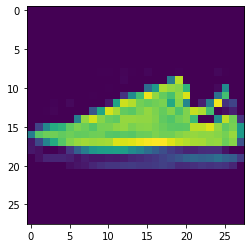

In [48]:
#Example of 1 item
plt.imshow(train_images[6])

In [43]:
# labels are integers ranging from 0 - 9
np.unique(train_labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [49]:
#Data preprocessing
#we do a simple preprocessing by scaling all our greyscale pixel values (0-255) to be between 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

<b>5.2 Building the Model</b>

We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right).

- <b>Input layer</b>: Flatten means that we reshape each image (28,28) into 784 pixels and each pixel will be associayed with 1 neuron. 
- <b>Hidden layer</b>: Dense denotes that this hidden layer will be fully connected; each neuron from the previous layer connects to each neuron from this layer. It has 128 neurons and uses the rectify linear unit activation function.
- <b>Output layer</b>: Another dense layer which has 10 neuros. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class.   

In [50]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
                          keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
                          keras.layers.Dense(10, activation='softmax')]) # output layer (3)

<b>5.3 Compiling the Model</b>

It's to define the loss function, optimizer and metrics we would like to track.

In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<b>5.4 Training & Evaluating the Model</b>

In [52]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4960 - accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3746 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3357 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3146 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2943 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2813 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2700 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2598 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2484 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [53]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 815us/step - loss: 0.3487 - accuracy: 0.8817
Test accuracy: 0.8816999793052673


<b>5.5 Making Predictions</b>

In [54]:
predictions = model.predict(test_images)

If we wan't to get the value with the highest score we can use a useful function from numpy called argmax(). This simply returns the index of the maximium value from a numpy array.

prediction:  9 =  Ankle boot



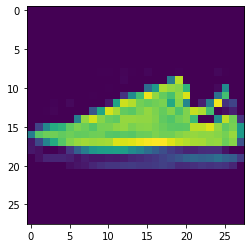

In [61]:
prediction_0 = np.argmax(predictions[0])
print('prediction: ',prediction_0,'= ',class_names[prediction_0])
print('')
plt.imshow(train_images[6])

<b><big>6. Convolutional Neural Networks</b></big>

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.

Assume that the goal of our network will be to determine whether an image is a cat or not

<b>Dense Layer:</b> A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.

A dense neural network learns patterns that are present in one specific area of an image. This means if a pattern that the network knows is present in a different area of the image it will have to learn the pattern again in that new area to be able to detect it.

Let's consider our dense neural network that has learned what an eye looks like from a sample of cat images. Let's say it's determined that an image is likely to be a cat if an eye is present in a certain location

Since our densly connected network has only recognized patterns globally it will look where it thinks the eyes should be present.If the image is flipped, it would likely determine this image is not a cat. Even though the pattern of the eyes is present, it's just in a different location.

<b>Convolutional Layer:</b> The convolutional layer will look at specific parts of the image and detect patterns.

Convolutional layers learn and detect patterns from different areas of the image. They know what an eye looks like and by analyzing different parts of the image can find where it is present.

<b>6.1 Dataset

The problem we will consider here is classifying 10 different everyday objects. The dataset is built into tensorflow and called the CIFAR Image Dataset. It contains 60,000 32x32 color images with 6000 images of each class.

Labels: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck

In [63]:
#loading
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 31s 0us/step


In [64]:
#Normalizing
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

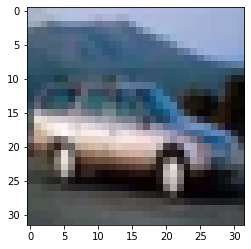

In [66]:
plt.imshow(train_images[4] ,cmap=plt.cm.binary)

<b>6.2 CNN Architecture</b>

A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

In [70]:
from tensorflow.keras import layers, models

In [73]:
model = models.Sequential()

#Convolutional Base:
#Layer1: The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. 
#We will also apply the activation function relu to the output of each convolution operation.
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))

#Layer2: This layer will perform the max pooling operation using 2x2 samples and a stride of 2.
model.add(layers.MaxPooling2D((2,2)))

#Other layers
#Here the frequency of filters is increased from 32 to 64. We can do this as our data shrinks in spacial dimensions as 
#it passed through the layers, meaning we can afford (computationally) to add more depth.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [75]:
#Adding Dense Layers
model.add(layers.Flatten())  #flatten the conv layer to turn them into an 'input' layer for the dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

<b>6.3 Training & Evaluating the Model

In [77]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 26s 17ms/step - loss: 1.5360 - accuracy: 0.4386 - val_loss: 1.3153 - val_accuracy: 0.5256
Epoch 2/4
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1779 - accuracy: 0.5803 - val_loss: 1.0720 - val_accuracy: 0.6176
Epoch 3/4
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0310 - accuracy: 0.6343 - val_loss: 1.0233 - val_accuracy: 0.6401
Epoch 4/4
1563/1563 [==============================] - 26s 16ms/step - loss: 0.9268 - accuracy: 0.6741 - val_loss: 1.0056 - val_accuracy: 0.6562


In [78]:
#Evaluating
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 1.0056 - accuracy: 0.6562
0.6561999917030334


<b><big>7. Natural Language Processing</b></big>

<b>7.1 Encoding Text</b><br>

machine learning models and neural networks don't take raw text data as an input.

a) Bag of words

The first and simplest way to encode our data is to use something called <b>bag of words</b>. Each word in a sentence is encoded with an integer and thrown into a collection that does not maintain the order of the words but does keep track of the frequency.

In [1]:
vocab = {}   #maps words to integers
word_encoding = 1

def bag_of_words(text):
    global word_encoding
    
    words = text.lower().split(" ")
    bag = {}  #stores the encodings and their frequency
    
    for word in words:
        if word in vocab:
            encoding = vocab[word]  #get encoding
        else:
            vocab[word] = word_encoding  #set new encoding
            encoding = word_encoding
            word_encoding += 1
        
        if encoding in bag:
            bag[encoding] += 1  #increase the count of an existing encoding
        else:
            bag[encoding] = 1   #it's a new encoding, set its count to 1
    
    return bag

In [10]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

print("Positive:", bag_of_words(positive_review))
print("Negative:", bag_of_words(negative_review))

Positive: {1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1}
Negative: {1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 1, 7: 1, 8: 1, 13: 1, 10: 1, 11: 1, 12: 1, 9: 1}


b) Integer Encoding

This involves representing each word or character in a sentence as a unique integer and maintaining the order of these words.

In [8]:
vocab = {}
word_encoding = 1

def one_hot_encoding(text):
    global word_encoding
    
    words = text.lower().split(" ")
    encoding = []
    
    for word in words:
        if word in vocab:
            encoding.append(vocab[word])
        else:
            vocab[word] = word_encoding
            encoding.append(vocab[word])
            word_encoding += 1
            
    return encoding

In [11]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

print("Positive:", one_hot_encoding(positive_review))
print("Negative:", one_hot_encoding(negative_review))

Positive: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 5, 12, 13]
Negative: [1, 2, 3, 4, 5, 6, 7, 8, 13, 10, 11, 5, 12, 9]


b) Word Embeddings

This third method is far superior. It keeps the order of words intact as well as encodes similar words with very similar labels. It attempts to not only encode the frequency and order of words but the meaning of those words in the sentence. It encodes each word as a dense vector that represents its context in the sentence.

Unlike the previous techniques word embeddings are learned by looking at many different training examples. You can add what's called an embedding layer to the beggining of your model and while your model trains your embedding layer will learn the correct embeddings for words. You can also use pretrained embedding layers.

<b>7.2 Recurrent Neural Networks</b><br>

- Up until this point we have been using <b>feed-forward</b> neural networks. all our data is fed forwards (all at once) from left to right through the network. This won't work very well for processing text. 

- We humans process the text by reading word by word from left to right and keeping track of the current meaning of the sentence so we can understand the meaning of the next word. a recurrent neural network is designed to do the same thing. 

- A <b>recurrent neural network</b> is a network that contains a loop. It will process one word at a time while maintaining an internal memory of what it's already seen. This will allow it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one word at a time.

- We treat our text data as a sequence so that we can pass one word at a time to the RNN.

<u>Course Notebook Link:</u><br>
- Core Learning Algorithms: https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay#forceEdit=true&sandboxMode=true&scrollTo=5suI1lmskE7p <br> 
- Neural Networks with TensorFlow: <br>
https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true <br>
- Deep Computer Vision (Convolutional Neural Networks): <br>
https://colab.research.google.com/drive/1ZZXnCjFEOkp_KdNcNabd14yok0BAIuwS#forceEdit=true&sandboxMode=true
- Natural Language Processing
https://colab.research.google.com/drive/1ysEKrw_LE2jMndo1snrZUh5w87LQsCxk#forceEdit=true&sandboxMode=true
- Reinforcement Learning
https://colab.research.google.com/drive/1IlrlS3bB8t1Gd5Pogol4MIwUxlAjhWOQ#forceEdit=true&sandboxMode=true